<a href="https://colab.research.google.com/github/Zebfred/DS-Unit-2-Regression-Classification/blob/master/w6d0_4th_kaggle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obj


## Obj.

  
1. Exploring(gettin' Acquinted) 
  
2. Cleaning 

    2.5-Make that baseline   
    
     [X] Clean
     
     [X] Do train/validate/test split with the Tanzania Waterpumps data.
     
      [X] Define a function to wrangle train, validate, and test sets in the same way.
     
3. Feature engineering

  -[X] Use a scikit-learn pipeline 
  
  -[_] Ordinal
  
 
4. Algorism selections 
 
  -[X] fit a decision tree classifier.
  
  [_] tree ensemble
  
  [X] outliers and engineer features. 

5. Model training

   [X] Get your validation accuracy score.

6. Visualizations, submissions, publish

  [X] Get and plot feature importances.
  
  [X] Submit predictions to our Kaggle competition.
  

  



##Setup

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Total 5 (delta 4), reused 4 (delta 4), pack-reused 1
Unpacking objects: 100% (5/5), done.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
   cd8a068..f5efe86  master     -> origin/master
Updating cd8a068..f5efe86
Fast-forward
 module2/assignment_kaggle_challenge_2.ipynb        | 283 +++----
 module2/lesson_kaggle_challenge_2.ipynb            | 603 ++++++++++----
 ...oost_missing_values_monotonic_constraints.ipynb | 869 ---------------------
 module3/assignment_ka

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

 ### Do train/validate/test split with the Tanzania Waterpumps data.

In [0]:
#import pandas_profiling
#train.profile_report()

In [0]:
from sklearn.model_selection import train_test_split

target = 'status_group'
X = train.drop(columns=target)
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.25, test_size=0.75, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: ignored

 # Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. 

In [0]:
#Hig carniality 
'''Warnings
date_recorded only contains datetime values, but is categorical.
funder has a high cardinality: 1898 distinct values	Warning
installer has a high cardinality: 2146 distinct values	Warning
lga has a high cardinality: 125 distinct values	Warning
num_private is highly skewed (γ1 = 91.93374999)	Skewed
quantity_group is a recoding of quantity	Rejected
recorded_by has constant value "GeoData Consultants Ltd"	Rejected
scheme_name has a high cardinality: 2697 distinct values	Warning
subvillage has a high cardinality: 19288 distinct values	Warning
ward has a high cardinality: 2092 distinct values	Warning
wpt_na
'''

'''
Both
funder 
installer
number_priv


'''

'\nBoth\nfunder \ninstaller\nnumber_priv\n\n\n'

In [0]:
train_MVP = train.drop(#Zeros and recode
    columns =['amount_tsh', 'scheme_management', 'scheme_name'
                         , 'permit', 'public_meeting'
                         ,'installer', 'funder','subvillage'
                         , 'public_meeting', 'num_private'
                         , 'permit', 'population'
                         , 'quantity_group', 'subvillage'
                         , 'construction_year', 'gps_height'
                         ,'recorded_by'      
                         , 'lga', 'ward', 'wpt_name']
                         )
# last 3 are cardinal

#Zeros or missing
'''Warnings
amount_tsh has 41639 (70.1%) zeros	Zeros
construction_year has 20709 (34.9%) zeros	Zeros
gps_height has 20438 (34.4%) zeros	Zeros
installer has 3655 (6.2%) missing values	Missing
longitude has 1812 (3.1%) zeros	Zeros
num_private has 58643 (98.7%) zeros	Zeros
permit has 3056 (5.1%) missing values	Missing
population has 21381 (36.0%) zeros	Zeros
public_meeting has 3334 (5.6%) missing values	Missing
quantity_group is a recoding of quantity	Rejected
scheme_management has 3877 (6.5%) missing values	Missing
scheme_name has 28166 (47.4%) missing values	Missing


'''


'Warnings\namount_tsh has 41639 (70.1%) zeros\tZeros\nconstruction_year has 20709 (34.9%) zeros\tZeros\ngps_height has 20438 (34.4%) zeros\tZeros\ninstaller has 3655 (6.2%) missing values\tMissing\nlongitude has 1812 (3.1%) zeros\tZeros\nnum_private has 58643 (98.7%) zeros\tZeros\npermit has 3056 (5.1%) missing values\tMissing\npopulation has 21381 (36.0%) zeros\tZeros\npublic_meeting has 3334 (5.6%) missing values\tMissing\nquantity_group is a recoding of quantity\tRejected\nscheme_management has 3877 (6.5%) missing values\tMissing\nscheme_name has 28166 (47.4%) missing values\tMissing\n\n\n'

In [0]:
train_MVP.sort_values('status_group', ascending=False)

# determined with number of errors?

#vwc , never pay, 

,id,date_recorded,longitude,latitude,basin,region,region_code,district_code,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
29700,62962,2013-02-27,34.953500,-1.099144e+01,Ruvuma / Southern Coast,Ruvuma,10,3,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
47310,68678,2013-01-18,39.270532,-1.014393e+01,Ruvuma / Southern Coast,Lindi,80,23,ksb,submersible,submersible,wua,user-group,pay per bucket,per bucket,soft,good,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
47300,23331,2013-03-15,36.699855,-2.637790e+00,Internal,Arusha,2,6,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
47301,9236,2013-02-24,35.277221,-9.835509e+00,Lake Nyasa,Ruvuma,10,2,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
47303,52955,2011-09-04,34.571402,-9.082989e+00,Rufiji,Iringa,11,4,gravity,gravity,gravity,wua,user-group,pay when scheme fails,on failure,soft,good,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
47304,71665,2011-04-03,33.908362,-9.307387e+00,Lake Nyasa,Mbeya,12,4,gravity,gravity,gravity,parastatal,parastatal,unknown,unknown,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
22349,32856,2013-03-07,37.617139,-3.766654e+00,Pangani,Kilimanjaro,3,2,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,insufficient,spring,spring,groundwater,other,other,non functional
22348,63734,2012-10-09,33.172166,-3.641184e+00,Lake Victoria,Shinyanga,17,3,other,other,other,unknown,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,other,other,non functional
22345,3733,2012-10-21,34.165059,-3.371300e+00,Internal,Shinyanga,17,6,other,other,other,wug,user-group,never pay,never pay,salty abandoned,salty,enough,shallow well,shallow well,groundwater,other,other,non functional
22343,20276,2013-06-03,38.087699,-4.418574e+00,Pangani,Kilimanjaro,3,3,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional


In [0]:
train[['region', 'region_code', 'district_code' ]].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59360,59361,59362,59363,59364,59365,59366,59367,59368,59369,59370,59371,59372,59373,59374,59375,59376,59377,59378,59379,59380,59381,59382,59383,59384,59385,59386,59387,59388,59389,59390,59391,59392,59393,59394,59395,59396,59397,59398,59399
region,Iringa,Mara,Manyara,Mtwara,Kagera,Tanga,Shinyanga,Shinyanga,Tabora,Kagera,Pwani,Ruvuma,Shinyanga,Kilimanjaro,Shinyanga,Rukwa,Iringa,Iringa,Mwanza,Iringa,Iringa,Shinyanga,Iringa,Kilimanjaro,Kigoma,Kilimanjaro,Lindi,Kagera,Kilimanjaro,Kilimanjaro,Dodoma,Pwani,Kilimanjaro,Iringa,Pwani,Arusha,Mbeya,Dodoma,Iringa,Kigoma,...,Mbeya,Tabora,Iringa,Singida,Kagera,Iringa,Singida,Iringa,Dodoma,Mbeya,Kigoma,Shinyanga,Tabora,Rukwa,Shinyanga,Tanga,Singida,Tabora,Iringa,Kagera,Iringa,Tanga,Kilimanjaro,Lindi,Kagera,Mara,Rukwa,Dar es Salaam,Kigoma,Rukwa,Rukwa,Kilimanjaro,Mbeya,Tabora,Morogoro,Kilimanjaro,Iringa,Mbeya,Dodoma,Morogoro
region_code,11,20,21,90,18,4,17,17,14,18,60,10,17,3,17,15,11,11,19,11,11,17,11,3,16,3,80,18,3,3,1,6,3,11,60,2,12,1,11,16,...,12,14,11,13,18,11,13,11,1,12,16,17,14,15,17,4,13,14,11,18,11,4,3,80,18,20,15,7,16,15,15,3,12,14,5,3,11,12,1,5
district_code,5,2,4,63,1,8,3,3,6,1,43,5,2,7,6,2,4,4,1,5,4,1,4,3,3,4,23,1,1,7,4,1,4,5,63,2,3,1,7,1,...,2,4,4,4,3,4,2,3,6,2,2,2,4,1,1,4,2,2,4,3,5,8,4,62,30,4,2,2,1,3,2,3,1,2,6,5,4,7,4,2


In [0]:
#trtrain_MVP.head(120)

#drop id , , extra_type_group

# region drop once you have region code

#longitude missing will drop, latitude as well covered as region_code

# district_code 
#management_group colinear ti manegement

#payment type double code

#permit?

#df[df.region_code < 21]

#df[df.permit != True | False]
#df[df.population != True | False]
# if I want to invegate 0's 

#quanity group mostly good some other variables present 

# source has different types, source class mostly groundwater

#water_quality

#water_type_group duplicates



train_MVP1 =  train_MVP.drop(#more detailed look
    columns = ['id', 'extraction_type_group', 'region', 'district_code'
               , 'payment_type', 'management_group', 'longitude', 'latitude'
               , 'waterpoint_type_group', ] )
    
    
#df[df.region_code < 21]

In [0]:
train_MVP1.head()

,date_recorded,basin,region_code,extraction_type,extraction_type_class,management,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group
0,2011-03-14,Lake Nyasa,11,gravity,gravity,vwc,pay annually,soft,good,enough,spring,spring,groundwater,communal standpipe,functional
1,2013-03-06,Lake Victoria,20,gravity,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
2,2013-02-25,Pangani,21,gravity,gravity,vwc,pay per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,functional
3,2013-01-28,Ruvuma / Southern Coast,90,submersible,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,non functional
4,2011-07-13,Lake Victoria,18,gravity,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional


In [0]:
train_MVP2 = train_MVP1.drop( #another pass warrented
columns = ['extraction_type_class','quality_group','source_type'])

df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)

In [0]:
train_MVP2.head()

,date_recorded,basin,region_code,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,2011-03-14,Lake Nyasa,11,gravity,vwc,pay annually,soft,enough,spring,groundwater,communal standpipe,functional
1,2013-03-06,Lake Victoria,20,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,2013-02-25,Pangani,21,gravity,vwc,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,2013-01-28,Ruvuma / Southern Coast,90,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,2011-07-13,Lake Victoria,18,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


(For example, what other columns have zeros and shouldn't? What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

In [0]:
train['region_code'].head().transpose()

In [0]:
import numpy as np

def wrangle(X):
#     """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    X = X.drop(#Zeros and missing values
    columns =['amount_tsh', 'scheme_management', 'scheme_name'
                         , 'permit', 'public_meeting'
                         ,'installer', 'funder','subvillage'
                         , 'public_meeting', 'num_private'
                         , 'permit', 'population'
                         , 'quantity_group', 'subvillage'
                         , 'construction_year', 'gps_height'
                         ,'recorded_by'
              #high cardality
                         , 'lga', 'ward', 'wpt_name'
                         , 'id' , 'extraction_type_group'
              # redundant 
                         ,  'region', 'district_code'
                         , 'payment_type', 'management_group', 'longitude', 'latitude'
                         , 'waterpoint_type_group'
                         ,'extraction_type_class','quality_group','source_type'
             ])

# region drop once you have region code

#longitude missing will drop, latitude as well covered by region_code

# district_code 
#management_group colinear ti manegement

#payment type double code

#permit? population

#df[df.region_code < 21]

#df[df.permit != True | False]
#df[df.population != True | False]
# if I want to invegate 0's 

#quanity group mostly good some other variables present 

# source has different types, source class mostly groundwater

#water_quality

#water_type_group duplicates

    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
  
          
    #X['region_code'] = [X.region_code < 21]
    X['region_revised'] = X['region_code'].apply(lambda x: x if x <= 21 else 22)
# return the wrangled dataframe
    X = X.drop(#Zeros and missing values
    columns =['region'])
    
    return X

#

In [0]:
 #notreal COde
#30$ xzeros
  X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()
    contruction
    populations 
    gps_height
   
  #5% zeros
  funder
    installer
    permit
    public_meeting
    schem_management
    lat and long
    
   #high Cat >= 360
  subvillage
  ward
  wpt_name
 #125
  lga
    

In [0]:

train_w = wrangle(train)
# val = wrangle(val)
test_w = wrangle(test)

In [0]:
train_w.head()

,date_recorded,basin,region_code,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group,region_revised
0,2011-03-14,Lake Nyasa,11,gravity,vwc,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,11
1,2013-03-06,Lake Victoria,20,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,20
2,2013-02-25,Pangani,21,gravity,vwc,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,21
3,2013-01-28,Ruvuma / Southern Coast,90,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional,22
4,2011-07-13,Lake Victoria,18,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,18


In [0]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target 
train_features = train_w.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['region_code', 'basin', 'extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source', 'source_class', 'waterpoint_type']


In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train_w[features]
y_train = train_w[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.

Get your validation accuracy score.
 Get and plot your feature importances.

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7277777777777777


In [0]:
train[train.fuctional == 'functional'  ]

tree decision

###Ordinal encoding

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
ordinal = pipeline.fit(X_train, y_train)
print('Validation Accuracy', ordinal.score(X_val, y_val))

Validation Accuracy 0.8194444444444444


In [0]:
ordinal.fit

In [0]:
forest = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
forest.fit(X_train, y_train)
print('Validation Accuracy', forest.score(X_val, y_val))

Validation Accuracy 0.8197811447811448


###OneHotEncoding

###random forest classifer

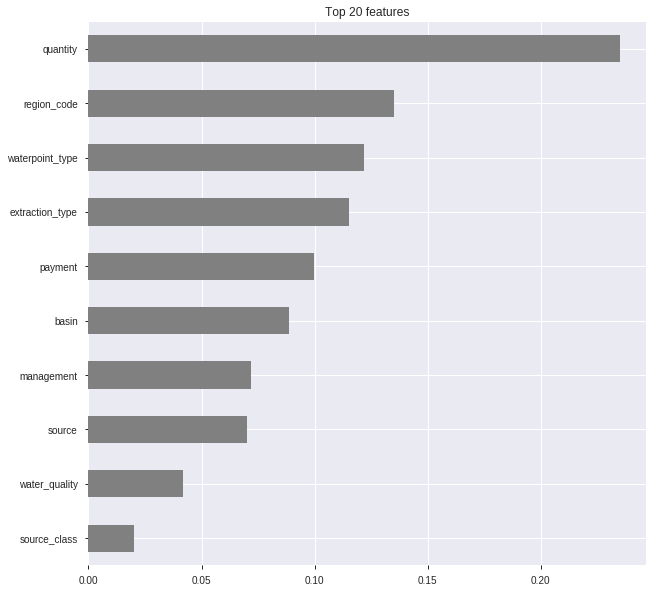

In [0]:
# Get feature importances
imp = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(imp.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

###Corr for logistic

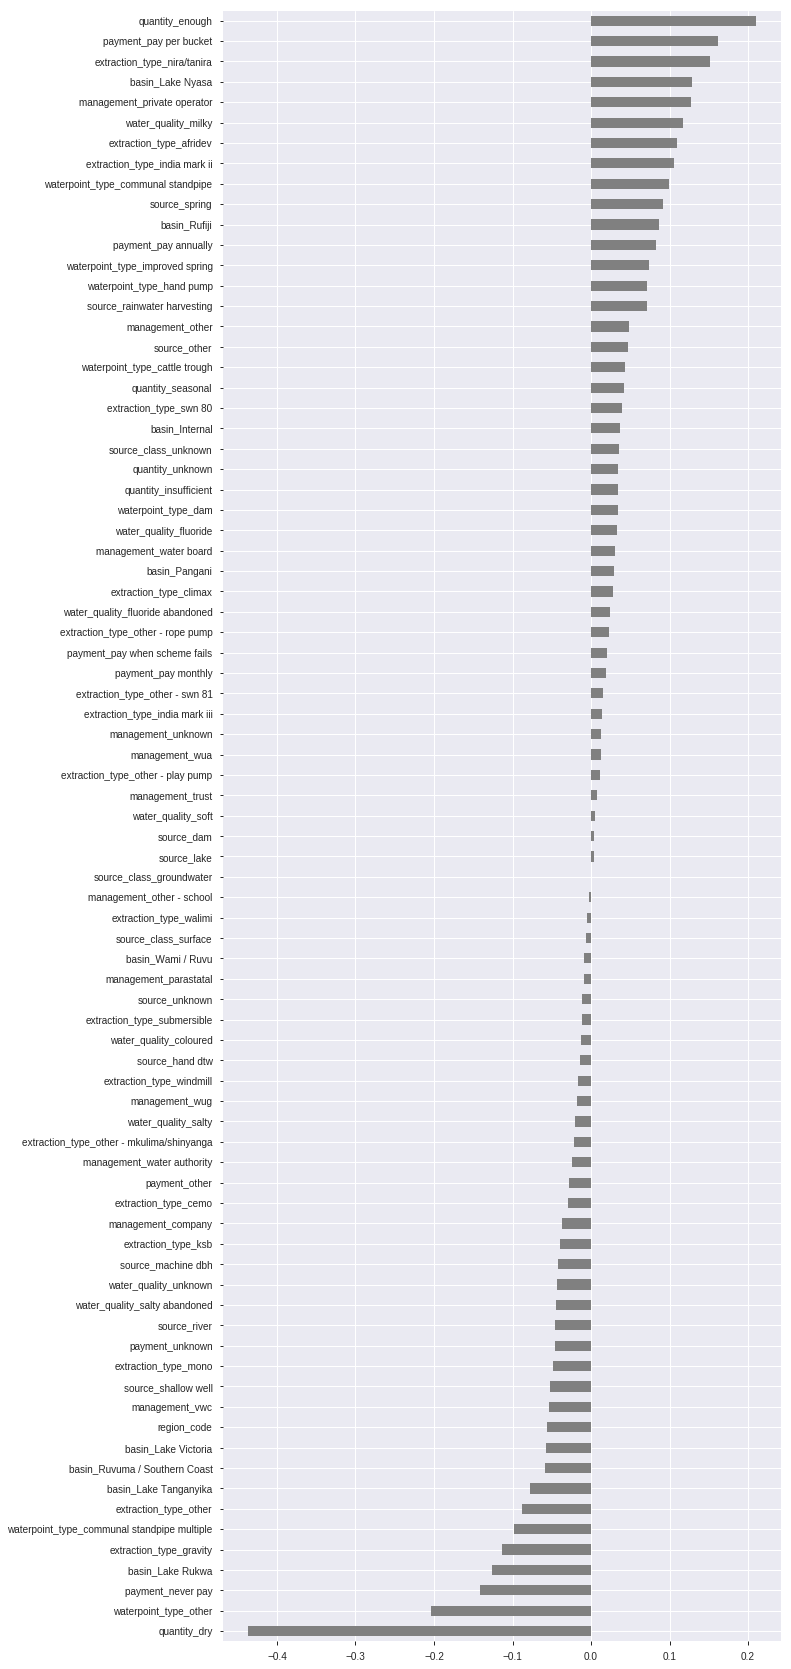

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

### decision tree 

In [0]:
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
     SimpleImputer(), 
    DecisionTreeClassifier(max_depth=max_features, random_state=42)
)

Tree1 = pipeline.fit(X_train, y_train)

In [0]:
?DecisionTreeClassifier(max_depth=max_features, random_state=42)

Object `DecisionTreeClassifier` not found.


In [0]:
print('Train Accuracy',Tree1.score(X_train, y_train))
print('Validation Accuracy', Tree1.score(X_val, y_val))

Train Accuracy 0.7870202020202021
Validation Accuracy 0.7860269360269361


In [0]:
# TODO
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
#     StandardScaler(), 
    DecisionTreeClassifier(random_state=42) # This line was the only thing changed from the previous code cell
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.8175757575757576
Validation Accuracy 0.8182659932659933


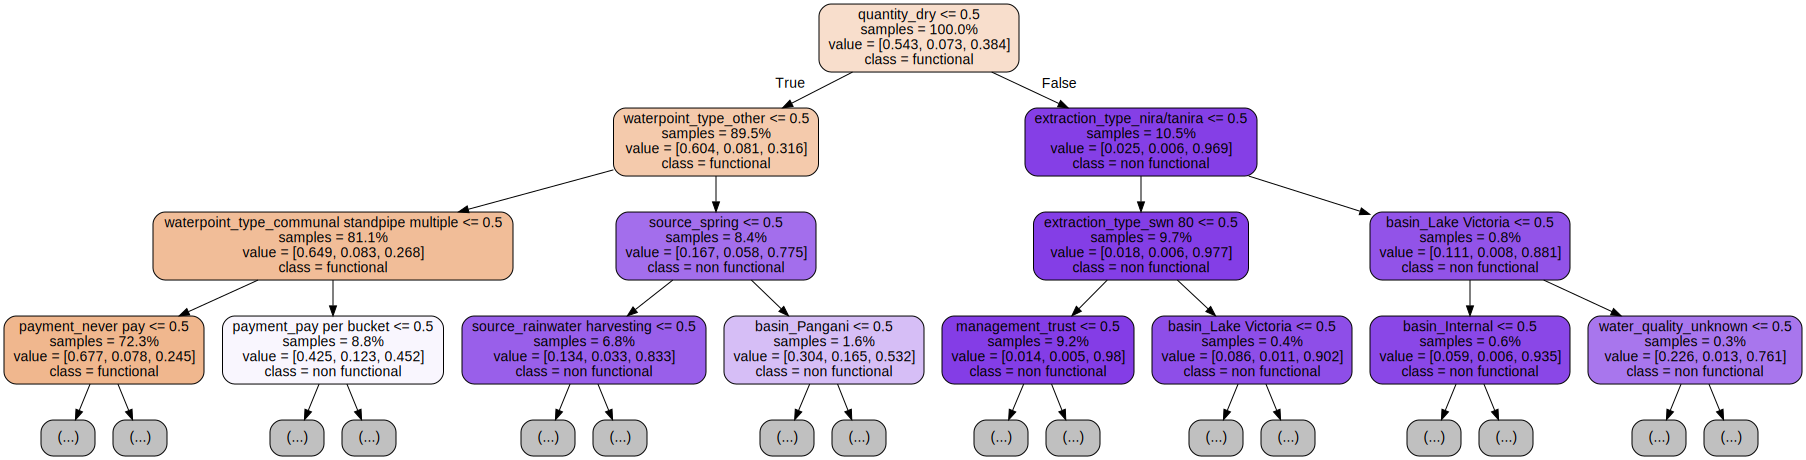

In [0]:
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

#Submission

In [0]:
test_3rd = forest.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = test_3rd
submission.to_csv('Kag_water_3rd_Zeb_smith-02.csv', index=False)


In [0]:
if in_colab:
    from google.colab import files
    # Just try again if you get this error:
    # TypeError: Failed to fetch
    # https://github.com/googlecolab/colabtools/issues/337
    files.download('Kag_water_3rd_Zeb_smith-02.csv')
